# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [23]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
from newsapi import NewsApiClient
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/tundehambolu/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [29]:
# Read your api key environment variable
api_key = os.getenv("NEWS_API_KEY")

In [32]:
# Create a newsapi client
newsapi = NewsApiClient(api_key=api_key)
newsapi = "b33cbb038fea4585a842571591de8271"

In [33]:
# Fetch the Bitcoin news articles
bitcoin_news = newsapi.get_everything(
    q="bitcoin",
    language="en"
)

AttributeError: 'str' object has no attribute 'get_everything'

In [6]:
def create_df(news, language):
    articles = []
    for article in news:
        try:
            title = article["title"]
            description = article["description"]
            text = article["content"]
            date = article["publishedAt"][:10]

            articles.append({
                "title": title,
                "description": description,
                "text": text,
                "date": date,
                "language": language
            })
        except AttributeError:
            pass

    return pd.DataFrame(articles)

In [9]:
bitcoin_df = create_df(bitcoin_news["articles"], "en")

In [10]:
# Fetch the Ethereum news articles
ethereum_news = newsapi.get_everything(
    q="ethereum",
    language="en"
)
ethereum_df = create_df(ethereum_news["articles"], "en")

In [11]:
def get_sentiment(score):
    """
    Calculates the sentiment based on the compound score.
    """
    result = 0  # Neutral by default
    if score >= 0.05:  # Positive
        result = 1
    elif score <= -0.05:  # Negative
        result = -1

    return result

In [12]:
# Create the Bitcoin sentiment scores DataFrame
title_sent = {
    "title_compound": [],
    "title_pos": [],
    "title_neu": [],
    "title_neg": [],
    "title_sent": [],
}
text_sent = {
    "text_compound": [],
    "text_pos": [],
    "text_neu": [],
    "text_neg": [],
    "text_sent": [],
}

# Get sentiment for the text and the title
for index, row in bitcoin_df.iterrows():
    try:
        # Sentiment scoring with VADER
        title_sentiment = analyzer.polarity_scores(row["title"])
        title_sent["title_compound"].append(title_sentiment["compound"])
        title_sent["title_pos"].append(title_sentiment["pos"])
        title_sent["title_neu"].append(title_sentiment["neu"])
        title_sent["title_neg"].append(title_sentiment["neg"])
        title_sent["title_sent"].append(get_sentiment(title_sentiment["compound"]))

        text_sentiment = analyzer.polarity_scores(row["text"])
        text_sent["text_compound"].append(text_sentiment["compound"])
        text_sent["text_pos"].append(text_sentiment["pos"])
        text_sent["text_neu"].append(text_sentiment["neu"])
        text_sent["text_neg"].append(text_sentiment["neg"])
        text_sent["text_sent"].append(get_sentiment(text_sentiment["compound"]))
    except AttributeError:
        pass

# Attaching sentiment columns to the News DataFrame
title_sentiment_df = pd.DataFrame(title_sent)
text_sentiment_df = pd.DataFrame(text_sent)
bitcoin_df = bitcoin_df.join(title_sentiment_df).join(text_sentiment_df)


In [13]:
# Create the Ethereum sentiment scores DataFrame
title_sent = {
    "title_compound": [],
    "title_pos": [],
    "title_neu": [],
    "title_neg": [],
    "title_sent": [],
}
text_sent = {
    "text_compound": [],
    "text_pos": [],
    "text_neu": [],
    "text_neg": [],
    "text_sent": [],
}

# Get sentiment for the text and the title
for index, row in ethereum_df.iterrows():
    try:
        # Sentiment scoring with VADER
        title_sentiment = analyzer.polarity_scores(row["title"])
        title_sent["title_compound"].append(title_sentiment["compound"])
        title_sent["title_pos"].append(title_sentiment["pos"])
        title_sent["title_neu"].append(title_sentiment["neu"])
        title_sent["title_neg"].append(title_sentiment["neg"])
        title_sent["title_sent"].append(get_sentiment(title_sentiment["compound"]))

        text_sentiment = analyzer.polarity_scores(row["text"])
        text_sent["text_compound"].append(text_sentiment["compound"])
        text_sent["text_pos"].append(text_sentiment["pos"])
        text_sent["text_neu"].append(text_sentiment["neu"])
        text_sent["text_neg"].append(text_sentiment["neg"])
        text_sent["text_sent"].append(get_sentiment(text_sentiment["compound"]))
    except AttributeError:
        pass

# Attaching sentiment columns to the News DataFrame
title_sentiment_df = pd.DataFrame(title_sent)
text_sentiment_df = pd.DataFrame(text_sent)
ethereum_df = ethereum_df.join(title_sentiment_df).join(text_sentiment_df)

In [16]:
# Describe the Bitcoin Sentiment
bitcoin_df.describe()

,title_compound,title_pos,title_neu,title_neg,title_sent,text_compound,text_pos,text_neu,text_neg,text_sent
count,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000
mean,-0.071438,0.05296,0.848350,0.098680,-0.140000,-0.007680,0.062810,0.87187,0.065380,0.040000
std,0.290965,0.10001,0.175697,0.148332,0.710953,0.431776,0.065431,0.08496,0.071288,0.886715
min,-0.908100,0.00000,0.284000,0.000000,-1.000000,-0.948500,0.000000,0.62800,0.000000,-1.000000
25%,-0.255800,0.00000,0.744000,0.000000,-1.000000,-0.312300,0.000000,0.81500,0.000000,-1.000000
50%,0.000000,0.00000,0.889000,0.000000,0.000000,0.000000,0.061500,0.86800,0.064000,0.000000
75%,0.000000,0.10100,1.000000,0.169000,0.000000,0.328950,0.106750,0.93100,0.104000,1.000000
max,0.771700,0.49200,1.000000,0.716000,1.000000,0.865500,0.269000,1.00000,0.372000,1.000000


In [17]:
# Describe the Ethereum Sentiment
ethereum_df.describe()

,title_compound,title_pos,title_neu,title_neg,title_sent,text_compound,text_pos,text_neu,text_neg,text_sent
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,-0.068232,0.070500,0.825680,0.103830,-0.100000,0.040080,0.074310,0.862710,0.062950,0.010000
std,0.356564,0.120573,0.185789,0.164011,0.731679,0.475662,0.073378,0.087919,0.069939,0.904478
min,-0.908100,0.000000,0.353000,0.000000,-1.000000,-0.948500,0.000000,0.628000,0.000000,-1.000000
25%,-0.243725,0.000000,0.710000,0.000000,-1.000000,-0.381800,0.000000,0.817750,0.000000,-1.000000
50%,0.000000,0.000000,0.844500,0.000000,0.000000,0.000000,0.063500,0.863000,0.060500,0.000000
75%,0.000000,0.127250,1.000000,0.187500,0.000000,0.435000,0.127250,0.924250,0.092500,1.000000
max,0.757900,0.452000,1.000000,0.639000,1.000000,0.877900,0.265000,1.000000,0.372000,1.000000


### Questions:

Q: Which coin had the highest mean positive score?

A: Bitcoin has the highest mean positive score 

Q: Which coin had the highest compound score?

A: Ethereum has the highest compound score 

Q. Which coin had the highest positive score?

A: Ethereum has the highest positive score 

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [18]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [20]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

# Create a list of stopwords
sw = set(stopwords.words('english'))

# Expand the default stopwords list if necessary
sw_addons = {}


In [21]:
# Complete the tokenizer function
def tokenizer(text):
    
    """Tokenizes text."""
    
    # Remove the punctuation from text
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', text)
   
    # Create a tokenized list of the words
     
    words = word_tokenize(re_clean)
    # Lemmatize words into root words
    
    lem = [lemmatizer.lemmatize(word) for word in words]
    
   
    # Convert the words to lowercase
    # Remove the stop words
    tokens = [word.lower() for word in lem if word.lower() not in sw.union(sw_addons)]
    
    
    
    
    return tokens

In [22]:
# Create a new tokens column for Bitcoin
bitcoin_df["tokenized"] = [tokenizer(line) for line in bitcoin_df["text"]]
bitcoin_df.head()

,title,description,text,date,language,title_compound,title_pos,title_neu,title_neg,title_sent,text_compound,text_pos,text_neu,text_neg,text_sent,tokenized
0,Jay-Z and Jack Dorsey Launch Bitcoin Academy f...,"Rapper and entrepreneur Shawn Carter, better k...","Rapper and entrepreneur Shawn Carter, better k...",2022-06-09,en,0.0000,0.000,1.000,0.000,0,0.4404,0.077,0.923,0.000,1,"[rapper, entrepreneur, shawn, carter, better, ..."
1,Bitcoin Wasn't as Decentralized or Anonymous a...,A new study on bitcoin calls into question whe...,A new study on bitcoin calls into question whe...,2022-06-08,en,0.0000,0.000,1.000,0.000,0,0.5267,0.124,0.876,0.000,1,"[new, study, bitcoin, call, question, whether,..."
2,El Salvador: The country where you can buy any...,The cryptocurrency crash is hurting many inves...,By Joe TidyCyber reporter \r\nCryptocurrencies...,2022-06-16,en,0.0000,0.000,1.000,0.000,0,0.2960,0.134,0.792,0.074,1,"[joe, tidycyber, reporter, cryptocurrencies, c..."
3,El Salvador's Bitcoin investment suffers amid ...,El Salvador has embraced Bitcoin like no other...,(CNN)El Salvador has embraced Bitcoin like no ...,2022-06-15,en,-0.4767,0.000,0.693,0.307,-1,0.1027,0.087,0.867,0.046,1,"[cnnel, salvador, ha, embraced, bitcoin, like,..."
4,Recommended Reading: A blockchain primer,Does the crypto crash mean the blockchain Is o...,"Stephen J. Dubner, Freakonomics Radio\r\nIn th...",2022-06-25,en,0.2023,0.375,0.625,0.000,1,0.2023,0.060,0.940,0.000,1,"[stephen, j, dubner, freakonomics, radioin, in..."


In [23]:
# Create a new tokens column for Ethereum
ethereum_df["tokenized"] = [tokenizer(line) for line in ethereum_df["text"]]
ethereum_df.head()

,title,description,text,date,language,title_compound,title_pos,title_neu,title_neg,title_sent,text_compound,text_pos,text_neu,text_neg,text_sent,tokenized
0,‘Axie Infinity’ hack victims will only get bac...,"Sky Mavis, the developer of blockchain game Ax...","Sky Mavis, the developer of blockchain game Ax...",2022-06-24,en,-0.5574,0.00,0.723,0.277,-1,-0.7184,0.000,0.846,0.154,-1,"[sky, mavis, developer, blockchain, game, axie..."
1,"Guy Who Told Everyone to Buy Ethereum at $2,90...","Jim Cramer, the CNBC host who’s reportedly wor...","Jim Cramer, the CNBC host whos reportedly wort...",2022-06-23,en,0.0000,0.00,1.000,0.000,0,0.5106,0.107,0.893,0.000,1,"[jim, cramer, cnbc, host, reportedly, worth, l..."
2,Elaborate hack of 'Axie Infinity' tied to fake...,Axie Infinity was the prime example of crypto ...,Axie Infinity was the prime example of crypto ...,2022-07-06,en,-0.4767,0.00,0.763,0.237,-1,0.2263,0.077,0.923,0.000,1,"[axie, infinity, wa, prime, example, crypto, g..."
3,Ethereum Mining No Longer Profitable For Many ...,"For the first time since 2020, Ethereum mining...","The price of Ethereum has dropped below $1,250...",2022-06-18,en,0.7579,0.38,0.524,0.096,1,0.2732,0.063,0.937,0.000,1,"[price, ethereum, ha, dropped, energy, price, ..."
4,PayPal Lets Users Transfer Bitcoin and Ethereu...,PayPal announced on Tuesday that the service n...,The ability to conduct external transfers on P...,2022-06-07,en,0.0000,0.00,1.000,0.000,0,0.3182,0.059,0.941,0.000,1,"[ability, conduct, external, transfer, paypals..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [24]:
from collections import Counter
from nltk import ngrams

In [43]:
bit_list=[]
bit_list = bit_list.append(word for word in bitcoin_df['tokenized'])


None


In [34]:
# Generate the Bitcoin N-grams where N=2
#big_string = ' '.join(bitcoin_df)
bigrams = ngrams(bitcoin_df['tokenized'][0], n=2)


In [32]:
# Generate the Ethereum N-grams where N=2
# big_string = ' '.join(ethereum_df)
# bigrams = ngrams(big_string, n=2)

In [35]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [36]:
# Use token_count to get the top 10 words for Bitcoin
token_count(bigrams, N=10)

[(('rapper', 'entrepreneur'), 1),
 (('entrepreneur', 'shawn'), 1),
 (('shawn', 'carter'), 1),
 (('carter', 'better'), 1),
 (('better', 'known'), 1),
 (('known', 'jayz'), 1),
 (('jayz', 'bringing'), 1),
 (('bringing', 'bitcoin'), 1),
 (('bitcoin', 'place'), 1),
 (('place', 'grew'), 1)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin


In [64]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]


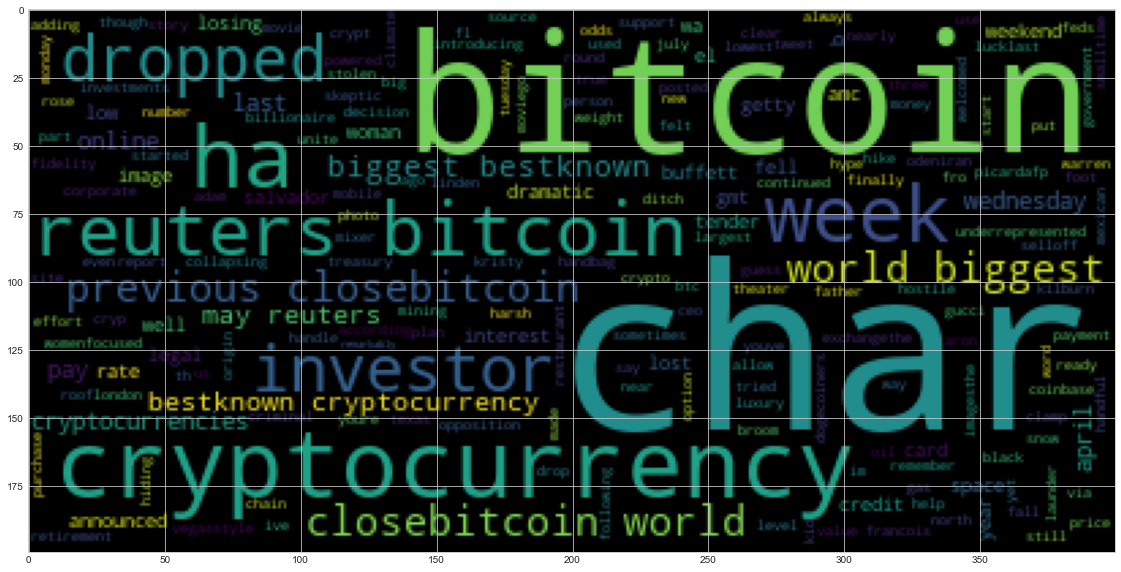

In [78]:
# Generate the Bitcoin word cloud
word_list = [item for sublist in bitcoin_df["tokenized"] for item in sublist]
wc = WordCloud().generate(' '.join(word_list))
plt.imshow(wc)

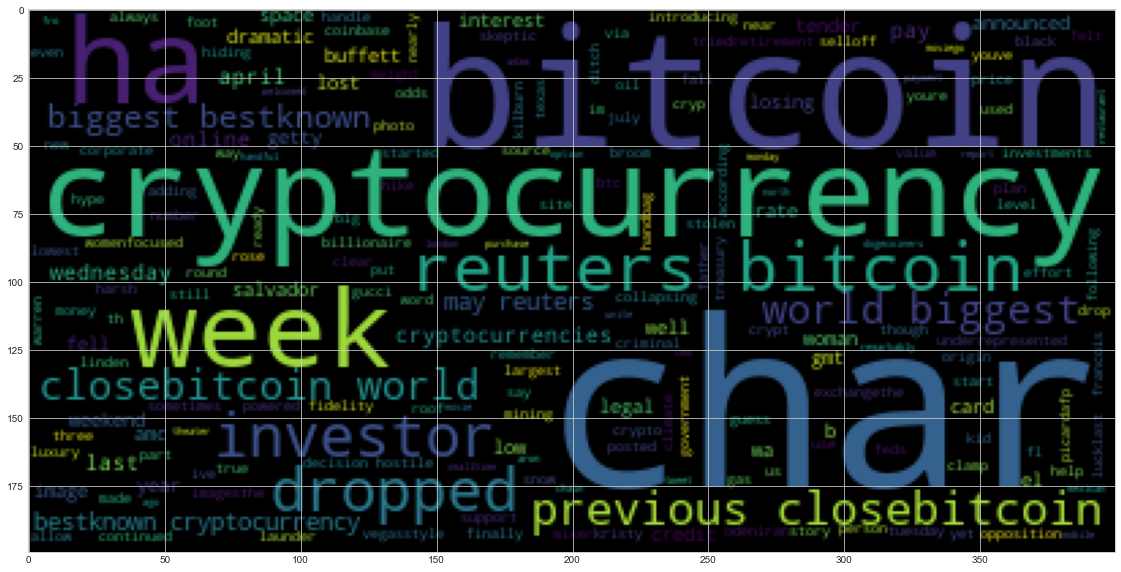

In [79]:
# Generate the Ethereum word cloud
word_list_eth = [item for sublist in ethereum_df["tokenized"] for item in sublist]
wc = WordCloud().generate(' '.join(word_list))
plt.imshow(wc)

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [81]:
import spacy
from spacy import displacy

In [25]:
# Download the language model for SpaCy
# !python -m spacy download en_core_web_sm

In [82]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [91]:
# Concatenate all of the Bitcoin text together
btc_text = []
for item in bitcoin_df["text"]:
    btc_text.append(item)

In [93]:
# Run the NER processor on all of the text
doc = nlp(btc_text)

# Add a title to the document
# YOUR CODE HERE!

ValueError: [E866] Expected a string or 'Doc' as input, but got: <class 'list'>.

In [92]:
# Render the visualization
displacy.render(doc, style='ent')

NameError: name 'doc' is not defined

In [30]:
# List all Entities
# YOUR CODE HERE!

---

### Ethereum NER

In [31]:
# Concatenate all of the Ethereum text together
# YOUR CODE HERE!

In [32]:
# Run the NER processor on all of the text
# YOUR CODE HERE!

# Add a title to the document
# YOUR CODE HERE!

In [33]:
# Render the visualization
# YOUR CODE HERE!

In [34]:
# List all Entities
# YOUR CODE HERE!

---